# Support Vector Machines

In [49]:
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


In [50]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)#OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)

In [51]:
# definimos una función para armar un dataset de juguete

def load_dataset_up_down(size, seed = 39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2,size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2,size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

In [52]:
# visualizamos las primeras 10 observaciones 
X, Y = load_dataset_up_down(100)
display(X[:10]), display (Y[:10])

array([[ -6,   3],
       [-11,   6],
       [  5, -13],
       [  5,   5],
       [  7,   7],
       [ -7,  -8],
       [ -2,   3],
       [ -5,   4],
       [ -2,  -6],
       [ -4,   9]])

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int8)

(None, None)

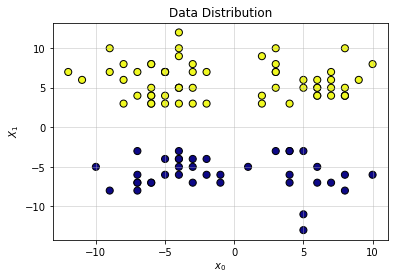

In [53]:

plt.scatter(x = X[:, 0], 
            y = X[:, 1],
            c=Y,
            s=50,
            edgecolors = 'k',
            cmap=plt.cm.plasma)

plt.xlabel('$x_0$')
plt.ylabel('$X_1$')
plt.title('Data Distribution')

plt.grid(alpha = 0.50)

plt.show()

Hacemos un clasificador basado en una **Support Vector Machine** [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

$0 = \mathbf{w^T x} + b = w_0 x_0 + w_1 x_1 + intercept \rightarrow x_1 =  - \frac{w_0}{w_1} x_0 - \frac{intercept}{w_1}$ 

In [54]:
# 1. Instanciamos el modelo. Usamos los hiperparámetros que vienen definidos por defecto
clf = LinearSVC(C=1.0) # Regularization parameter. The strength of the regularization is inversely proportional to C.

# 2. Entrenamos el modelo usando los datos X y las etiquetas Y
clf.fit(X,Y)

LinearSVC()

x_1 = 0.0013 * x_0 + -0.0008


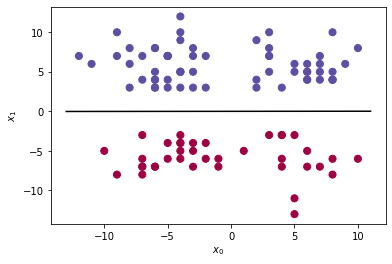

In [55]:
w = clf.coef_[0]
a = -w[0] / w[1]
b = -clf.intercept_[0] / w[1]
X_0 = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
X_1 = a * X_0 + b

plt.plot(X_0, X_1, 'k-', label = 'xxx')
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = plt.cm.Spectral)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
print (("x_1 = %.4f * x_0 + %.4f") % (a, b))


### Qué pasaría ahora con más datos?

Accuracy: 100 


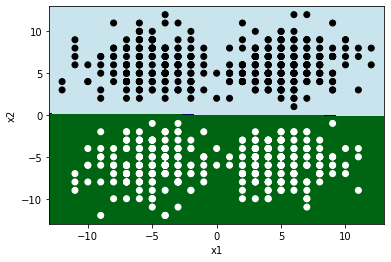

In [56]:
# import mlutils
X, Y = load_dataset_up_down(800)
# 1. Instanciamos el modelo. Usamos los hiperparámetros que vienen definidos por defecto
clf = LinearSVC(C=1.0) # Regularization parameter. The strength of the regularization is inversely proportional to C.

# 2. Entrenamos el modelo usando los datos X y las etiquetas Y
clf.fit(X,Y)
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

### Que pasa si tenemos una base de datos con algo de ruido?

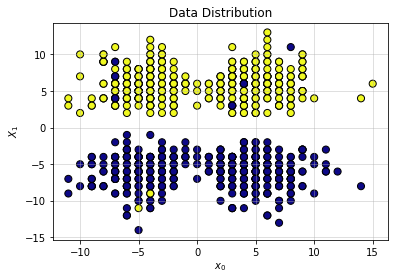

In [57]:
X, Y = load_dataset_up_down(800, 1)
some_noise = np.random.binomial(1, .03, Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)

plt.scatter(x = X[:, 0], 
            y = X[:, 1],
            c=Y,
            s=50,
            edgecolors = 'k',
            cmap=plt.cm.plasma)

plt.xlabel('$x_0$')
plt.ylabel('$X_1$')
plt.title('Data Distribution')

plt.grid(alpha = 0.50)

plt.show()

In [58]:
# 1. Instanciamos el modelo
clf = LinearSVC(C = 1)

# 2. Entrenamos el modelo, ahora usando datos que no son linealmente separables
clf.fit(X, Y)

LinearSVC(C=1)

x_1 = 0.0028 * x_0 + 0.0570


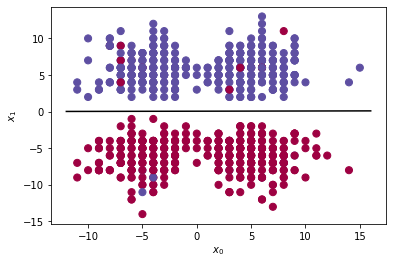

In [59]:
w = clf.coef_[0]
a = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
x_0 = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
x_1 = a * x_0 + b

plt.plot(x_0, x_1, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
print (("x_1 = %.4f * x_0 + %.4f") % (a, b))

Probemos con un conjunto de datos distinto y veamos como impacta la elección del parámetro C

Estamos minimizando ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))

$\lambda({C}) ||w||^2 + \frac{1}{n}\sum_{i=1}^n \max(0, 1-y_i (\mathbf{w^T x_i}-b))$

En principio, grandes valores de C resultan en márgenes menores y pequeños valores de C resultan en márgenes más amplios.

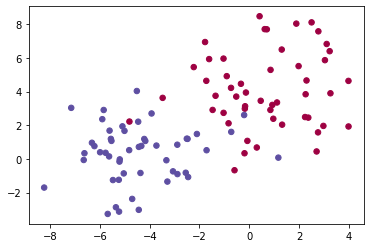

In [60]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Spectral)
plt.show()

0.1 - Accuracy: 94 
100 - Accuracy: 94 
1000 - Accuracy: 77 


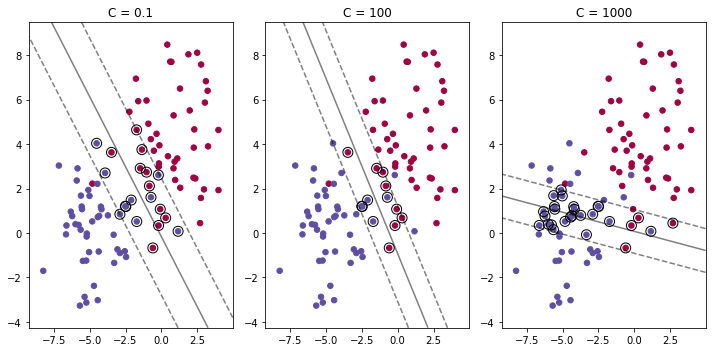

In [61]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([0.1, 100, 1000]):
    
    # 1. Instanciamos el modelo
    clf = LinearSVC(C=C,
                    loss="hinge",     # "hinge" is the standard SVM loss
                    random_state=26)
    
    # 2. Entrenamos el modelo
    clf.fit(X, Y)
    
    # 3. Utilizamos el modelo para hacer predicciones
    predictions = clf.predict(X)
    
    print (C, '- Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))
# --------------------------------------------------------------------------------    
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Spectral)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    
    plt.title("C = " + str(C))
plt.tight_layout()
plt.show()